In [ ]:
!pip install pint

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 9.3 MB/s eta 0:00:00


In [ ]:
import pint

In [ ]:
si = pint.UnitRegistry()

In [ ]:
T = 300 *si.K
T

<Quantity(300, 'kelvin')>

In [ ]:
T += 3 * si.mK
T

<Quantity(300.003, 'kelvin')>

In [ ]:
p = 1_000 *si.hPa
p

<Quantity(1000, 'hectopascal')>

In [ ]:
from scipy import constants

In [ ]:
R_str = constants.R * si.joule / si.kelvin / si.mole
R_str

<Quantity(8.31446262, 'joule / kelvin / mole')>

In [ ]:
md = 28.966 * si.kilogram / si.kmol
md

<Quantity(28.966, 'kilogram / kilomole')>

In [ ]:
T = (19 +constants.zero_Celsius) * si.K
T

<Quantity(292.15, 'kelvin')>

In [ ]:
p,md,R_str,T

(<Quantity(1000, 'hectopascal')>,
 <Quantity(28.966, 'kilogram / kilomole')>,
 <Quantity(8.31446262, 'joule / kelvin / mole')>,
 <Quantity(292.15, 'kelvin')>)

In [ ]:
density = p * md / (R_str * T)
density

<Quantity(11.9247271, 'hectopascal * kilogram * mole / kilomole / joule')>

In [ ]:
density.check('[density]')

True

In [ ]:
density.to_base_units()

<Quantity(1.19247271, 'kilogram / meter ** 3')>

---

In [ ]:
import pint
import numpy as np
from scipy import constants

def tetens(T: pint.Quantity) -> pint.Quantity:
  """Calculates saturation vapor pressure using the Tetens formula.

  Args:
    T: Temperature in Kelvin.

  Returns:
    Saturation vapor pressure in Pascals.
  """
  e_s = 6.1078 * si.hPa * (np.exp((17.27 * (T - 273.15 * si.K)) / (T + 237.3 * si.K)))
  return e_s


In [ ]:
tetens(T)

<Quantity(11.3511946, 'hectopascal')>

In [ ]:
from matplotlib import pyplot as plt
from open_atmos_jupyter_utils import show_plot

In [ ]:
si.setup_matplotlib()

In [ ]:
WoooW = np.linspace(273.15, 373.15, 100) * si.K
def plot(fig):
    fig.gca().plot(WoooW, tetens(WoooW), label='equilibrium vapour pressure')
    fig.legend()
    fig.gca().grid()

In [ ]:
fig = plt.figure(figsize=(4,4))
plot(fig)
show_plot(fig=fig)

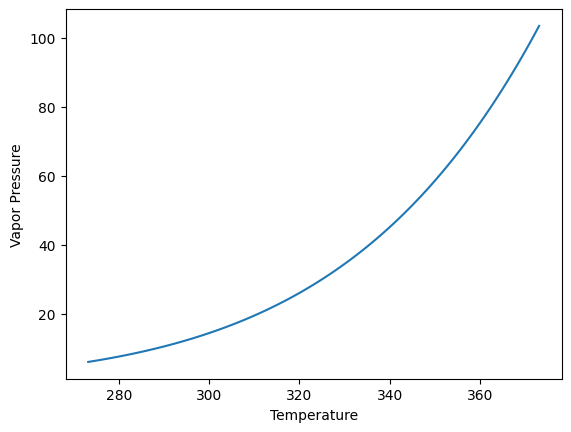

In [ ]:

plt.plot(WoooW,tetens(WoooW))
plt.xlabel('Temperature')
plt.ylabel('Vapor Pressure')
